In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
y_train[0]

array([6], dtype=uint8)

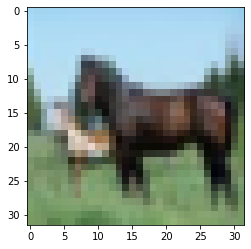

In [7]:
plt.imshow(x_train[12])

In [8]:
y_train[12]             # How do we know the relation between x_train and y_train variable

array([7], dtype=uint8)

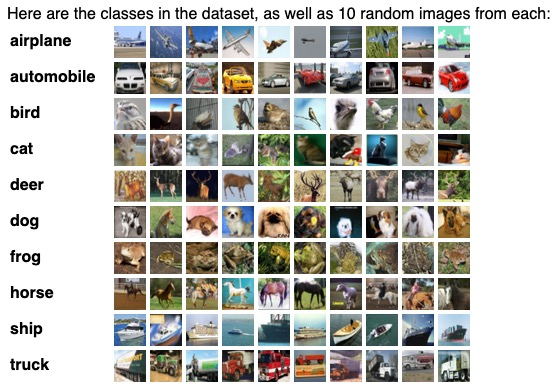

In [9]:
x_train = x_train/255

In [10]:
x_test = x_test/255

In [11]:
from keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train, 10)       # Total number of classes = 10

In [13]:
y_cat_test = to_categorical(y_test, 10)

In [14]:
y_cat_train.shape

(50000, 10)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [16]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32,32,3), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32,32,3), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [17]:
from keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 3)

In [19]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 54s 35ms/step - loss: 1.5053 - accuracy: 0.4608 - val_loss: 1.2819 - val_accuracy: 0.5419
Epoch 2/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1532 - accuracy: 0.5954 - val_loss: 1.2439 - val_accuracy: 0.5654
Epoch 3/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9960 - accuracy: 0.6532 - val_loss: 1.0387 - val_accuracy: 0.6391
Epoch 4/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8872 - accuracy: 0.6954 - val_loss: 0.9749 - val_accuracy: 0.6704
Epoch 5/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8000 - accuracy: 0.7234 - val_loss: 1.0989 - val_accuracy: 0.6453
Epoch 6/15
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7324 - accuracy: 0.7476 - val_loss: 1.0170 - val_accuracy: 0.6684
Epoch 7/15
1563/1563 [==============================] - 54s 34ms/step - loss: 0.6853 - accuracy: 0.7672 - val_loss: 1.1099 -

In [20]:
metrics_df = pd.DataFrame(model.history.history)

In [21]:
metrics_df

,loss,accuracy,val_loss,val_accuracy
0,1.505322,0.46076,1.281877,0.5419
1,1.153233,0.59544,1.243914,0.5654
2,0.996041,0.65320,1.038707,0.6391
3,0.887189,0.69538,0.974855,0.6704
4,0.800032,0.72342,1.098912,0.6453
5,0.732450,0.74758,1.017035,0.6684
6,0.685289,0.76722,1.109934,0.6556


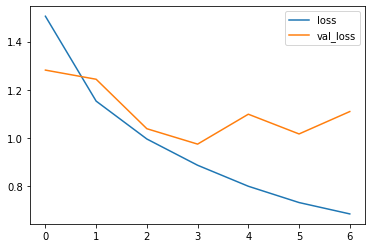

In [22]:
metrics_df[["loss", "val_loss"]].plot()

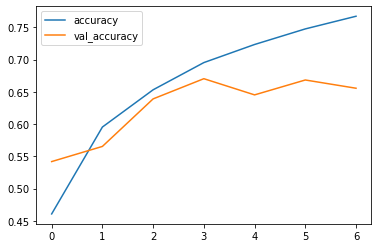

In [23]:
metrics_df[["accuracy", "val_accuracy"]].plot()

In [24]:
model.evaluate(x_test,y_cat_test, verbose=0)

[1.1099344491958618, 0.6556000113487244]

In [25]:
 from sklearn.metrics import classification_report, confusion_matrix

In [26]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65      1000
           1       0.67      0.88      0.76      1000
           2       0.64      0.49      0.56      1000
           3       0.55      0.41      0.47      1000
           4       0.61      0.63      0.62      1000
           5       0.62      0.50      0.55      1000
           6       0.62      0.84      0.72      1000
           7       0.84      0.67      0.74      1000
           8       0.66      0.79      0.72      1000
           9       0.61      0.79      0.69      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000

